In [1]:
#import pandas and os library in Jupyter Notebook environment:
import pandas as pd
import numpy as np
import os

In [2]:
dataset1 = pd.read_csv(r"C:\Users\hp\Desktop\New folder\insurance.csv")
dataset1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Creating x and y
x = dataset1['age']
y = dataset1['charges']

In [4]:
#a linear regression model using statesmodel

In [5]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [7]:
# Take a look at the train dataset
x_train

966     51
522     51
155     44
671     29
1173    38
        ..
802     21
53      36
350     57
79      41
792     22
Name: age, Length: 936, dtype: int64

In [8]:
y_train

966     23967.38305
522      9866.30485
155      6948.70080
671      3943.59540
1173     6457.84340
           ...     
802      2103.08000
53      37742.57570
350     11830.60720
79       6571.02435
792      2731.91220
Name: charges, Length: 936, dtype: float64

In [9]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
x_train_sm = sm.add_constant(x_train)

In [10]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, x_train_sm).fit()

# Printing the parameters
lr.params

const    2707.051837
age       267.740141
dtype: float64

In [11]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     99.76
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           2.18e-22
Time:                        13:39:19   Log-Likelihood:                -10082.
No. Observations:                 936   AIC:                         2.017e+04
Df Residuals:                     934   BIC:                         2.018e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2707.0518   1113.327      2.431      0.015     522.139    4891.965
age          267.7401     26.806      9.988      0.000     215.133     320.348
==============================================================================
Omnibus:                      284.664   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              613.549
Skew:                           1.743   Prob(JB):                    5.88e-134
Kurtosis:                       4.891   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns

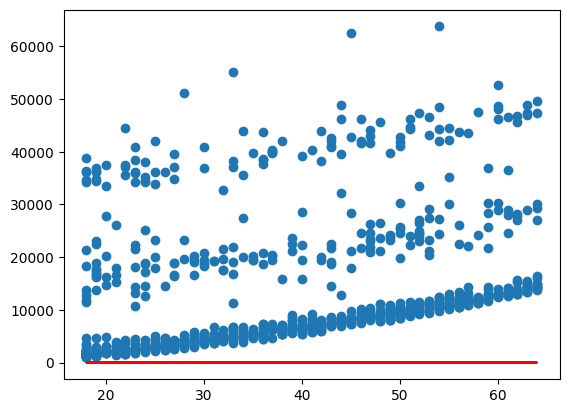

In [13]:
# Visualizing the regression line
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948 + 0.054*x_train, 'r')
plt.show()

In [14]:
# Predicting y_value using traingn data of x
y_train_pred = lr.predict(x_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

C:\Users\hp\AppData\Local\Temp\ipykernel_9400\663898164.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


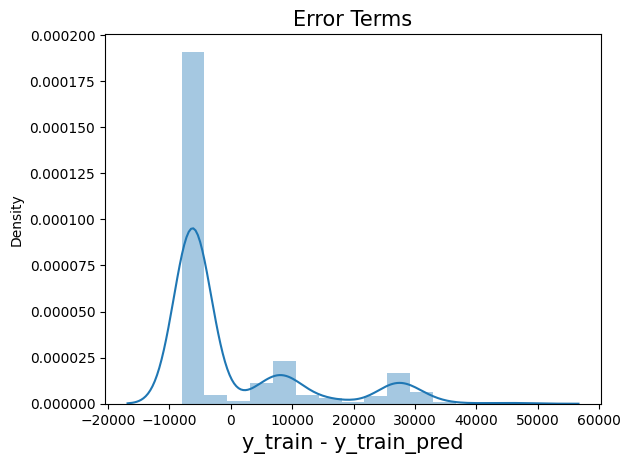

In [15]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

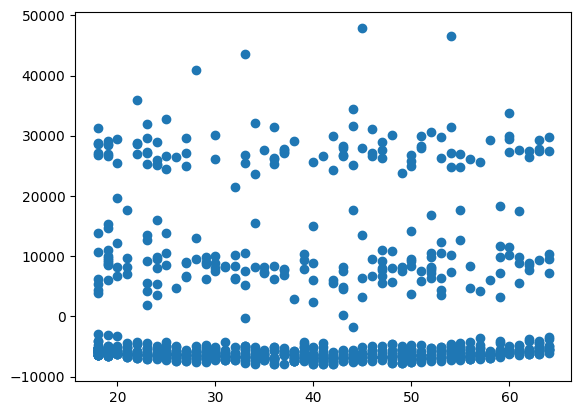

In [17]:
# Looking for any patterns in the residuals
plt.scatter(x_train,res)
plt.show()

In [18]:
# Adding a constant to x_test
x_test_sm = sm.add_constant(x_test)

# Predicting the y values corresponding to x_test_sm
y_test_pred = lr.predict(x_test_sm)

# Printing the first 15 predicted values
y_test_pred

12       8865.075077
306     10203.775782
318     14487.618036
815      8061.854655
157      7526.374373
            ...     
710      7526.374373
1005    10471.515923
389      9132.815218
923     11810.216627
1164    13684.397613
Length: 402, dtype: float64

In [19]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.07161898944046363

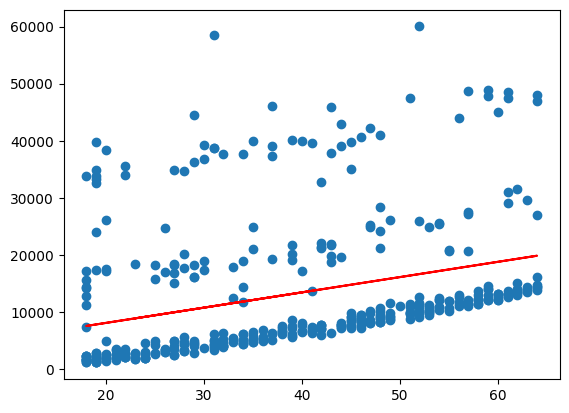

In [20]:
# Visualize the line on the test set
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_pred, 'r')
plt.show()

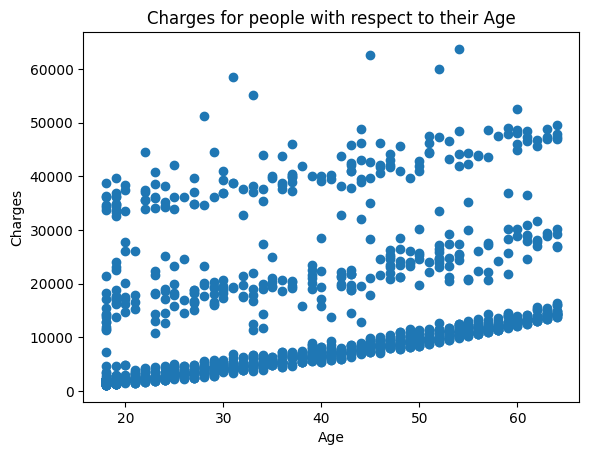

In [35]:
#Linear Regression

age_np=dataset1["age"].to_numpy()
charges_np=dataset1["charges"].to_numpy()

plt.scatter(age_np,charges_np)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Charges for people with respect to their Age')
plt.show()

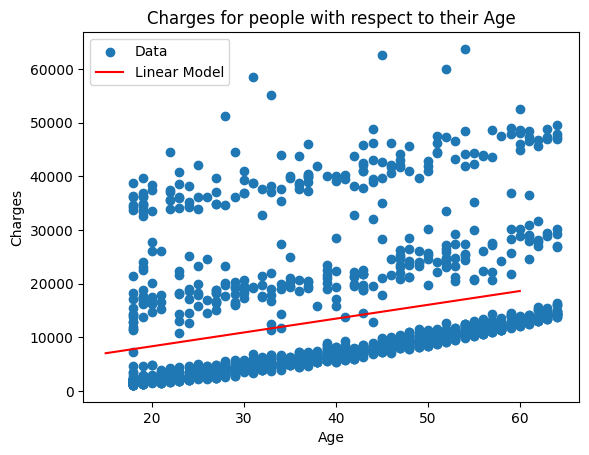

In [36]:
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(age_np.reshape((-1, 1)),charges_np)

dummy_inputs = np.linspace(15, 60)
dummy_predictions = linear_model.predict(dummy_inputs.reshape((-1, 1)))

plt.scatter(age_np,charges_np , label='Data')
plt.plot(dummy_inputs, dummy_predictions, label='Linear Model', color='red')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Charges for people with respect to their Age')
plt.legend()
plt.show()

In [37]:
#CALCULATING MEAN ABSOLUTE ERROR
from sklearn.metrics import mean_absolute_error as MAE

print("MAE =",MAE(linear_model.predict(age_np.reshape((-1, 1))),charges_np))

MAE = 9055.14962050455


In [38]:
#Calculating MEAN SQUARED ERROR
from sklearn.metrics import mean_squared_error as MSE

print("MSE =",MSE(linear_model.predict(age_np.reshape((-1, 1))), charges_np))

MSE = 133440978.61376347


In [39]:
#Calculating Root Mean Squared Error
print("RMSE =",MSE(linear_model.predict(age_np.reshape((-1, 1))),charges_np,squared=False))

RMSE = 11551.66562075632
